<a href="https://colab.research.google.com/github/nouraoaldawsari/T5/blob/main/Task_(1)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Description

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


\

## The dataset contains information about road traffic accidents with the following columns:

`Time`: Time of the accident

`Day_of_week`: Day of the week when the accident occurred

`Age_band_of_driver`: Age group of the driver

`Sex_of_driver`: Gender of the driver

`Educational_level`: Educational level of the driver

`Vehicle_driver_relation`: Relationship of the driver to the vehicle

`Driving_experience`: Driving experience of the driver

`Type_of_vehicle`: Type of vehicle involved in the accident

`Owner_of_vehicle`: Owner of the vehicle

`Service_year_of_vehicle`: Service years of the vehicle

`Area_accident_occured`: Area where the accident occurred

`Lanes_or_Medians`: Lanes or medians at the accident site

`Road_allignment`: Road alignment at the accident site

`Types_of_Junction`: Type of junction at the accident site

`Road_surface_type`: Type of road surface at the accident site

`Road_surface_conditions`: Road surface conditions at the accident site

`Light_conditions`: Light conditions at the time of the accident

`Weather_conditions`: Weather conditions at the time of the accident

`Type_of_collision`: Type of collision

`Number_of_vehicles_involved`: Number of vehicles involved in the accident

`Number_of_casualties`: Number of casualties in the accident

`Vehicle_movement`: Movement of the vehicle during the accident

`Casualty_class`: Class of casualty (driver, passenger, pedestrian)

`Sex_of_casualty`: Gender of the casualty

`Age_band_of_casualty`: Age group of the casualty

`Casualty_severity`: Severity of the casualty

`Work_of_casuality`: Occupation of the casualty

`Fitness_of_casuality`: Fitness of the casualty

`Pedestrian_movement`: Movement of the pedestrian

`Cause_of_accident`: Cause of the accident

`Accident_severity`: Severity of the accident


# Tasks

##1. Data Cleaning

### Read the dataset

In [99]:
#important libraries we might need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv("/content/drive/MyDrive/T5/Datasets/Task (1) Dataset.csv")

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

### Handle Missing Values

In [102]:
df.isna().sum() #checking for null values in our dataset

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [103]:
# we have 12316 entries so the 20%-30% of them should be
num = 12316 * 0.2 # choosing 20% to apply the approch
print(num) #output = nearly 2463
# as a result I will drop any column that has 2463 null values in it
cols_with_missings = [col for col in df.columns if df[col].isna().sum() >  2463]
print("\n", cols_with_missings)

2463.2000000000003

 ['Service_year_of_vehicle', 'Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality']


In [104]:
reduced_df = df.drop(cols_with_missings, axis = 1)

In [105]:
#checkiing additional step
print(reduced_df.isna().sum())

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Area_accident_occured          239
Lanes_or_Medians               385
Road_allignment                142
Types_of_Junction              887
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Pedestrian_movement              0
Cause_of_accident                0
Accident_severity                0
dtype: int64


In [106]:
reduced_df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


In [107]:
#dealing with the other missing by Imputation as a better approch
from sklearn.impute import SimpleImputer
df_plus = reduced_df.copy()
my_imputer = SimpleImputer()

In [108]:
cols_to_impute = [col for col in reduced_df.columns if reduced_df[col].isna().any()]
cols_to_impute

['Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Type_of_collision',
 'Vehicle_movement']

In [109]:
#add new column
'''for col in cols_to_impute:
  df_plus[col + '_was_missing'] =df_plus[col].isnall()
'''

"for col in cols_to_impute:\n  df_plus[col + '_was_missing'] =df_plus[col].isnall()\n"

In [110]:
'''imputed_df = pd.DataFrame(my_imputer.fit_transform(plus_df))
reduced_df.isna().sum()'''

for col in cols_to_impute:
  df_plus[col] = df_plus[col].fillna(df_plus[col].mode()[0]) #since it is non numrical values

#checking step
print(df_plus.isna().sum())

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64


### Correct any inconsistent data entries.

In [111]:
df_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

In [112]:
df_plus.duplicated().sum() # there is no duplcated values to handle then

0

### Ensure data types are appropriate for each column.

---



In [113]:
#changing the Time to Series datetime format
df_plus['Time']= pd.to_datetime(df_plus['Time']) #if required format needed add ',format='eg = %H:%M:%S' inside the ()

<ipython-input-113-2b56e4304652>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_plus['Time']= pd.to_datetime(df_plus['Time'])


In [114]:
df_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            12316 non-null  object        
 5   Vehicle_driver_relation      12316 non-null  object        
 6   Driving_experience           12316 non-null  object        
 7   Type_of_vehicle              12316 non-null  object        
 8   Owner_of_vehicle             12316 non-null  object        
 9   Area_accident_occured        12316 non-null  object        
 10  Lanes_or_Medians             12316 non-null  object        
 11  Road_allignment              12316 non-nu

## 2. Exploratory Data Analysis (EDA)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [116]:
df.head() #checking for first five rows into our data set

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [117]:
df_plus.tail() #checking for last five rows

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,2024-07-25 16:15:00,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Outside rural areas,...,2,1,Going straight,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12312,2024-07-25 18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Outside rural areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,No distancing,Slight Injury
12313,2024-07-25 13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,Outside rural areas,...,1,1,Other,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,2024-07-25 13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,Office areas,...,2,1,Other,na,na,na,na,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,2024-07-25 13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,Outside rural areas,...,2,1,Stopping,Pedestrian,Female,5,3,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [118]:
df_plus.sample() #showning random row in the dataset

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
698,2024-07-25 22:30:00,Sunday,18-30,Male,Junior high school,Owner,5-10yr,Public (12 seats),Owner,Market areas,...,2,5,Going straight,Passenger,Female,Under 18,3,Not a Pedestrian,Moving Backward,Slight Injury


### Perform summary statistics on the dataset.

In [119]:
df.describe() #by seeing the output we have two numrical columns only

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


### Identify and analyze patterns in the data.

In [119]:
#

### Visualize the distribution of key variables (e.g., Age_band_of_driver, Type_of_vehicle).

<Axes: xlabel='Age_band_of_driver', ylabel='Type_of_vehicle'>

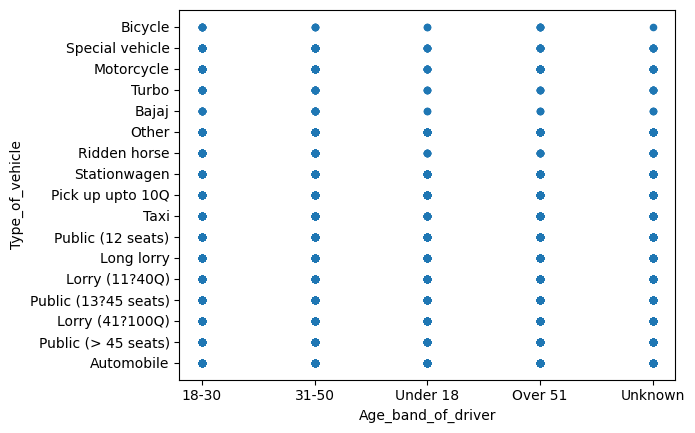

In [122]:
df_plus.plot.scatter(x ='Age_band_of_driver', y ='Type_of_vehicle') #not quite best use of plots for this case

<Axes: xlabel='Age_band_of_driver', ylabel='Type_of_vehicle'>

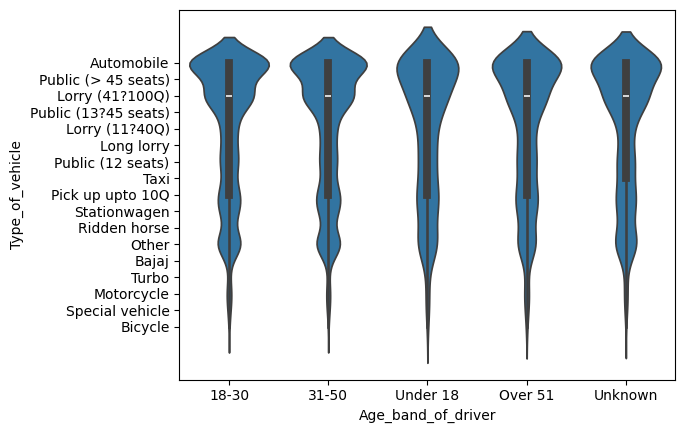

In [124]:
sns.violinplot(data = df_plus, x ='Age_band_of_driver', y ='Type_of_vehicle') #showing distribution depending on violin plot if we want to label type of vehicle that each age prefer

### Explore relationships between variables (e.g., Age_band_of_driver vs. Accident_severity).


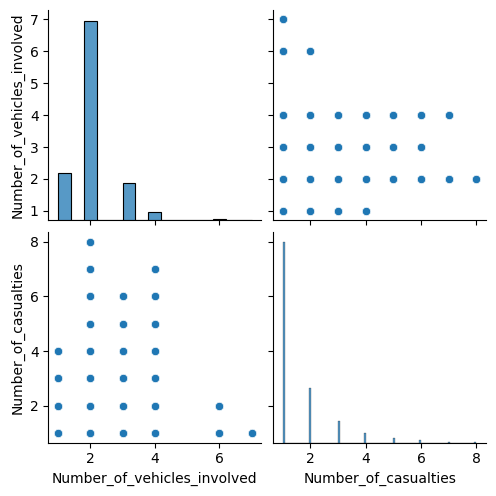

In [125]:
#since it is not clear numrical values I will choose pair plot
sns.pairplot(df_plus) #for numrical columns

In [126]:
df_plus.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2024-07-25 17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,2024-07-25 17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,2024-07-25 17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,2,2,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,2024-07-25 01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,2,2,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,2024-07-25 01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Industrial areas,...,2,2,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


## 3. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


<Axes: ylabel='Area_accident_occured'>

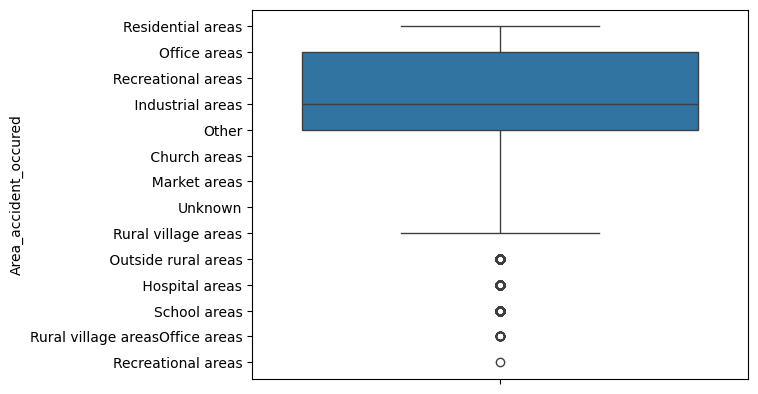

In [143]:
#looking for outliers
sns.boxplot(df_plus['Area_accident_occured'])

In [152]:
df_plus.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

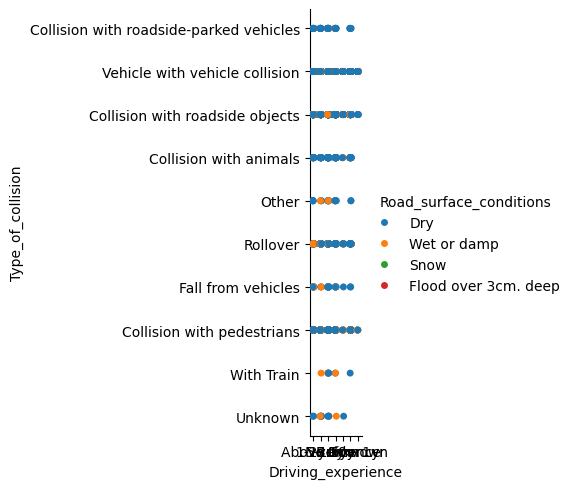

In [155]:
sns.catplot(data=df_plus, x="Driving_experience", y="Type_of_collision", hue="Road_surface_conditions")

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

In [137]:
numrical_cols = df[['Number_of_vehicles_involved','Number_of_casualties']]
corr_matrix = numrical_cols.corr()
corr_matrix

,Number_of_vehicles_involved,Number_of_casualties
Number_of_vehicles_involved,1.000000,0.213427
Number_of_casualties,0.213427,1.000000


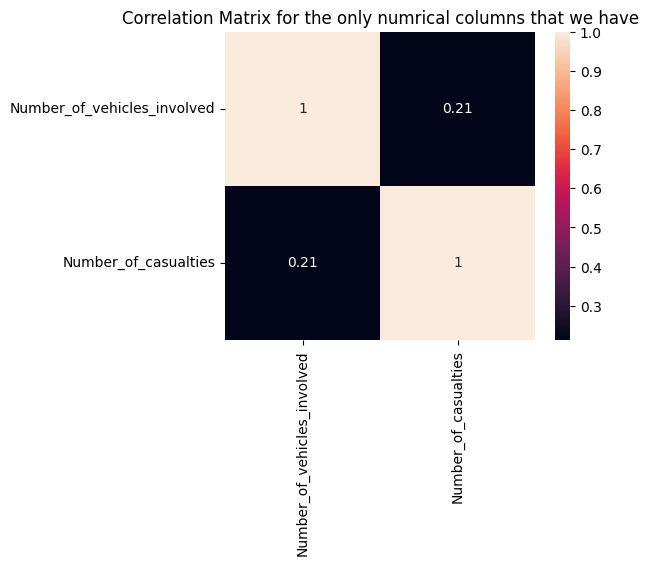

In [140]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot = True)
plt.title("Correlation Matrix for the only numrical columns that we have")
plt.show()

## 4. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

In [119]:
'''
for the dataset givin we can see a lot of null values as we can see in the real world condition
after dropping the columns that contains > 20% of the real data as one approch
and imputing the other columns that contains < 20% of the whole data set by (mode); since most of our data are categrical not numrical
and after visulizing the data by catplot since it is not numrical values we can say that we see that
most of collisions are not because of the Road_surface_conditions since collisions happend to dry.
for the relationship between our only two numrical values of (Number_of_vehicles_involved) & (Number_of_casualties) are showing closley no relationship to each other
'''